<a href="https://colab.research.google.com/github/PenroseTiles/Tensorflow2.0_Tutorials/blob/master/CNN_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN for MNIST



In [0]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers as optimizers
from tensorflow.keras import losses as losses
from tensorflow.keras import metrics as metrics
from tensorflow.keras import utils as utils
from tensorflow.keras import datasets as datasets
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import * 

In [2]:
print(tf.__version__)

2.2.0-rc4


In [0]:
def build_cnn()->Model:
  model = Sequential()
  model.add(Reshape(target_shape=[28,28,1], input_shape=[28,28]))
  model.add(Conv2D(10, kernel_size=(5,5),padding='same'))
  model.add(Conv2D(10, kernel_size=(7,7), padding='valid'))
  model.add(MaxPool2D())
  model.add(Reshape(target_shape=[1210]))
  model.add(Dense(10))
  model.add(Softmax())
  return model

In [0]:
cnn = build_cnn()
cnn.compile(optimizers.Adam(),
            loss = losses.CategoricalCrossentropy(),
            metrics=metrics.BinaryAccuracy())

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 10)        260       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 10)        4910      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 10)        0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1210)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12110     
_________________________________________________________________
softmax (Softmax)            (None, 10)                0

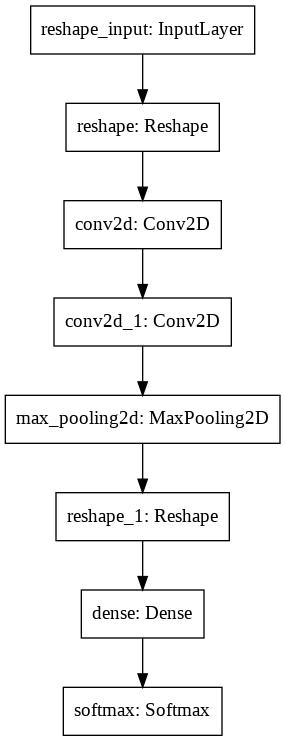

In [6]:
utils.plot_model(cnn)

In [7]:
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
train_ds = train_ds.map(lambda x, y :(x, tf.one_hot(y,depth=10)))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(10000).batch(32)
test_ds = test_ds.map(lambda x, y :(x, tf.one_hot(y,depth=10)))

In [9]:
tds = train_ds.as_numpy_iterator()
print(tds.next()[1].shape)
cnn.fit(train_ds, epochs=10)




(32, 10)
Epoch 1/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.2283 - binary_accuracy: 0.9871
Epoch 2/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0977 - binary_accuracy: 0.9943
Epoch 3/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0784 - binary_accuracy: 0.9953
Epoch 4/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0669 - binary_accuracy: 0.9960
Epoch 5/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0585 - binary_accuracy: 0.9964
Epoch 6/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0534 - binary_accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0488 - binary_accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0455 - binary_accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0429 - binary_

In [11]:
cnn.evaluate(x_test, tf.one_hot(y_test,depth=10))

313/313 [==============================] - 6s 18ms/step - loss: 0.0685 - binary_accuracy: 0.9962


[0.06850264966487885, 0.9962197542190552]